# EVALUATE MODELS

In [1]:
folds_paths = dict()
folds_paths['1'] = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/CreateFolds/new_dhs_incountry_folds.pkl'
fracs = ['0_01', '0_05', '0_1']
for frac in fracs:
    folds_paths[frac] = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/CreateFolds/dhs_incountry_folds_{}.pkl'.format(frac)
    
FOLDS = ['A', 'B', 'C', 'D', 'E']

# CHANGE THIS TO EVALUATE DIFFERENT MODEL
CHECKPOINTS_DIR = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/Supervised/moco_pretrained/0034_epochs'


In [2]:
import evaluate_model
import importlib
importlib.reload(evaluate_model)


/cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c106IValue23reportToTensorTypeErrorEv
  warn(f"Failed to load image Python extension: {e}")


<module 'evaluate_model' from '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/Supervised/evaluate_model.py'>

In [9]:
evaluate_model.evaluate_model(CHECKPOINTS_DIR, 'A', '1', gpu=0)

FOLD:  A
Best epoch:  15
Best epoch val_loss:  135.23674756830388
Model loaded:  /cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/Supervised/moco_pretrained/0034_epochs/fold_A/checkpoint_fold_A_0015.pth.tar
0 / 178
20 / 178
40 / 178
60 / 178
80 / 178
100 / 178
120 / 178
140 / 178
160 / 178
r2:  0.600631106621851
slope:  0.5318600736177816 intercept:  13.347803640952888


0.600631106621851

# __________________________________

In [3]:
import torch
import pandas as pd
import numpy as np
import pickle as pkl
import os
import glob

import supervised_dataset
import importlib
importlib.reload(supervised_dataset)

import sys
sys.path.insert(0, '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/geography-aware-ssl/moco_fmow/moco')
from ms_nl_resnet import MS_NL_ResNet18


In [ ]:
folds_paths = dict()
folds_paths['1'] = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/CreateFolds/new_dhs_incountry_folds.pkl'
fracs = ['0_01', '0_05', '0_1']
for frac in fracs:
    folds_paths[frac] = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/CreateFolds/dhs_incountry_folds_{}.pkl'.format(frac)
    
FOLDS = ['A', 'B', 'C', 'D', 'E']

# CHANGE THIS TO EVALUATE DIFFERENT MODEL
CHECKPOINTS_DIR = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/Supervised/moco_pretrained/0034_epochs'


for fold in FOLDS:
    # Read last loss file for fold and find best epoch
    print("FOLD: ", fold)
    fold_path = os.path.join(CHECKPOINTS_DIR, 'fold_{}'.format(fold))
    
    loss_files = []
    for file in os.listdir(fold_path):
        if 'losses' in file:
            loss_files.append(file)
    loss_files.sort()
    last_loss_file = loss_files[-1]
    
    #losses = pd.read_csv(os.path.join(fold_path, last_loss_file), sep=",", header=None)
    losses = pd.read_csv(os.path.join(fold_path, last_loss_file), sep=",", header=None)
    best_epoch = losses[1].argmin()
    print("Best epoch: ", best_epoch)
    print("Best epoch val_loss: ", losses[1].iloc[best_epoch])
                           
    
    # Create model and load checkpoint from best epoch
    model = MS_NL_ResNet18(num_classes=1, last_layer_activation = torch.nn.ReLU())
                           
    checkpoint_path = os.path.join(fold_path, 'checkpoint_fold_{}_{:04d}.pth.tar'.format(fold, best_epoch))
    checkpoint = torch.load(checkpoint_path, map_location='gpu')
                             
    checkpoint_dict = dict()
    for key in checkpoint['state_dict'].keys():
        resnet_key=key.replace("module.", "")
        checkpoint_dict[resnet_key]=checkpoint['state_dict'][key]
            
    model.load_state_dict(checkpoint_dict)
    print("Model loaded: ", checkpoint_path)
    
    break

FOLD:  A
Best epoch:  15
Best epoch val_loss:  135.23674756830388


In [31]:
loss_files

['losses_fold_A_epoch_0000_.txt',
 'losses_fold_A_epoch_0001_.txt',
 'losses_fold_A_epoch_0002_.txt',
 'losses_fold_A_epoch_0003_.txt',
 'losses_fold_A_epoch_0004_.txt',
 'losses_fold_A_epoch_0005_.txt',
 'losses_fold_A_epoch_0006_.txt',
 'losses_fold_A_epoch_0007_.txt',
 'losses_fold_A_epoch_0008_.txt',
 'losses_fold_A_epoch_0009_.txt',
 'losses_fold_A_epoch_0010_.txt',
 'losses_fold_A_epoch_0011_.txt',
 'losses_fold_A_epoch_0012_.txt',
 'losses_fold_A_epoch_0013_.txt',
 'losses_fold_A_epoch_0014_.txt',
 'losses_fold_A_epoch_0015_.txt',
 'losses_fold_A_epoch_0016_.txt',
 'losses_fold_A_epoch_0017_.txt',
 'losses_fold_A_epoch_0018_.txt',
 'losses_fold_A_epoch_0019_.txt',
 'losses_fold_A_epoch_0020_.txt',
 'losses_fold_A_epoch_0021_.txt',
 'losses_fold_A_epoch_0022_.txt',
 'losses_fold_A_epoch_0023_.txt',
 'losses_fold_A_epoch_0024_.txt',
 'losses_fold_A_epoch_0025_.txt',
 'losses_fold_A_epoch_0026_.txt',
 'losses_fold_A_epoch_0027_.txt',
 'losses_fold_A_epoch_0028_.txt',
 'losses_fold_

In [5]:
fold = 'A'
gpu = 0

losses = pd.read_csv('moco_pretrained/fold_{}/losses_fold_{}_epoch_0019_.txt'.format(fold, fold), sep=",", header=None)
best_epoch = losses[1].argmin()
print("Best epoch: ", best_epoch)
print("Best epoch val_loss: ", losses[1].iloc[best_epoch])

model = MS_NL_ResNet18(num_classes=1, last_layer_activation = torch.nn.ReLU())
#optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

checkpoint_path = 'moco_pretrained/fold_{}/checkpoint_fold_{}_{:04d}.pth.tar'.format(fold, fold, best_epoch)
print("Model loaded: ", checkpoint_path)
checkpoint = torch.load(checkpoint_path, map_location='cpu')

checkpoint_dict = dict()
for key in checkpoint['state_dict'].keys():
    resnet_key=key.replace("module.", "")
    checkpoint_dict[resnet_key]=checkpoint['state_dict'][key]
            
model.load_state_dict(checkpoint_dict)
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

Best epoch:  18
Best epoch val_loss:  148.2015194459395
Model loaded:  moco_pretrained/fold_A/checkpoint_fold_A_0018.pth.tar


<All keys matched successfully>

In [6]:
torch.cuda.set_device(gpu)
model.cuda(gpu)
print()

criterion = torch.nn.MSELoss().cuda(gpu)

In [7]:
csv = "/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/Supervised/dhs_clusters_paths.csv"
folds_path = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/CreateFolds/new_dhs_incountry_folds.pkl'


with open(folds_path, 'rb') as handle:
        folds = pkl.load(handle)
        
test_dataset = supervised_dataset.SupervisedDataset(csv, csv_indices=folds[fold]['test'])

batch_size = 64
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False)



In [8]:
# TEST MODEL
iwi_pred = []
iwi_true = []

model.eval()
for i, (images, labels) in enumerate(test_loader):
    #print(images.size())
    images = images.cuda(gpu)
    labels = labels.cuda(gpu)
    
    preds = model(images)
    preds = torch.squeeze(preds)
    #print(preds.size())
    
    loss = criterion(preds, labels)
    print(loss)
    
    for pred in preds:
        iwi_pred.append(pred.item())
    
    for label in labels:
        iwi_true.append(label.item())
    
    
    #iwi_preds.extend(preds.numpy())
    
    #print("batch: ", i)
    print(i, "/", len(test_loader))
    print()

tensor(281.8662, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  0 / 178

tensor(247.5207, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  1 / 178

tensor(197.9043, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  2 / 178

tensor(269.0547, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  3 / 178

tensor(188.0158, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  4 / 178

tensor(162.9675, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  5 / 178

tensor(85.5577, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  6 / 178

tensor(87.3397, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  7 / 178

tensor(71.9829, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  8 / 178

tensor(50.4787, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  9 / 178

tensor(83.7829, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  10 / 178

tensor(24.1866, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  11 / 178

tensor(57.1343, device='cuda:0', grad_fn=<MseLossBackward>)
batch:  

r2:  0.0753049044050279
slope:  0.5479105835472774 intercept:  9.296893041338746


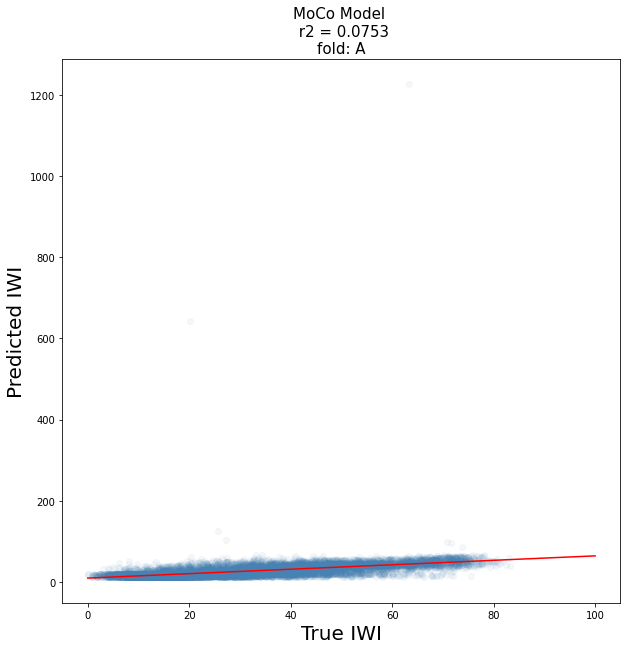

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline



r2 = r2_score(iwi_true, iwi_pred)
print("r2: ", r2)

plt.figure(figsize=(10,10))
plt.scatter(iwi_true, iwi_pred, alpha=0.05, c='steelblue')
m, b = np.polyfit(iwi_true, iwi_pred, 1)

x = [i for i in range(101)]
y = [i*m + b for i in x]

print("slope: ", m, "intercept: ", b)

plt.title('MoCo Model \n ' + 'r2 = ' + str(round(r2, 4)) + '\n' + 'fold: ' + str(fold), fontsize=15)
plt.xlabel('True IWI', fontsize=20)
plt.ylabel('Predicted IWI', fontsize=20)
plt.plot(x, y, c='red')



In [12]:
lossf = criterion(torch.Tensor(iwi_pred), torch.Tensor(iwi_true))
lossf

tensor(315.2536)

In [10]:
with open('moco_pretrained/preds_{}.pkl'.format(fold), 'wb') as f:
    pkl.dump(iwi_pred, f)

In [14]:
r2s = [0.5883925433999581, 0.7354329898282347, 0.6669216592643855, 0.6471751573302729, 0.6224771401384579]
print("Mean r2 between folds: ", np.mean(r2s))

Mean r2 between folds:  0.6520798979922618


r2:  0.5247186394443634
slope:  0.5479105835472774 intercept:  9.296893041338746


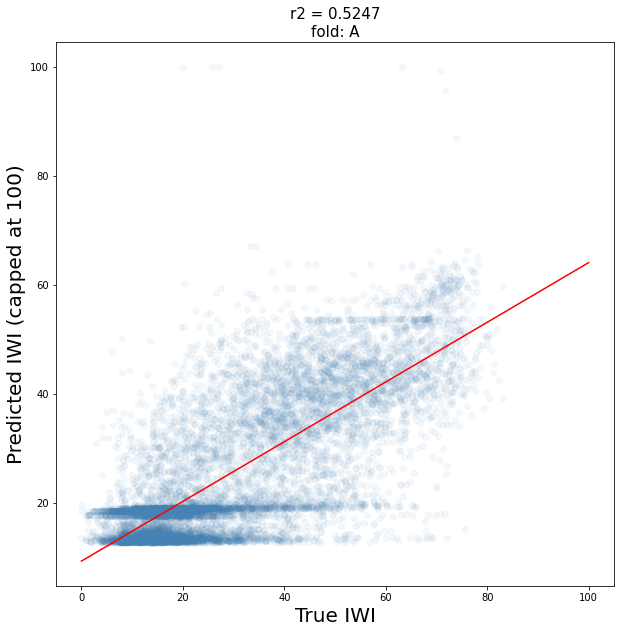

In [13]:
iwi_pred_capped = []
for iwi in iwi_pred:
    if iwi < 100:
        iwi_pred_capped.append(iwi)
    else:
        iwi_pred_capped.append(100)
        
r2 = r2_score(iwi_true, iwi_pred_capped)
print("r2: ", r2)

plt.figure(figsize=(10,10))
plt.scatter(iwi_true, iwi_pred_capped, alpha=0.05, c='steelblue')
m, b = np.polyfit(iwi_true, iwi_pred, 1)

x = [i for i in range(101)]
y = [i*m + b for i in x]

print("slope: ", m, "intercept: ", b)

plt.title('r2 = ' + str(round(r2, 4)) + '\n' + 'fold: ' + str(fold), fontsize=15)
plt.xlabel('True IWI', fontsize=20)
plt.ylabel('Predicted IWI (capped at 100)', fontsize=20)
plt.plot(x, y, c='red')


# Mean of GPU text files

In [3]:
import numpy as np
asd = [4589591, 3978083.5, 6040875.5, 2620361.125]
print(np.mean(asd))

asd2 = [97468989952.0, 11734740992.0, 13660009472.0, 11513879552.0]
print(np.mean(asd2))

4307227.78125
33594404992.0


In [22]:
folds_paths = dict()
folds_paths['1'] = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/CreateFolds/new_dhs_incountry_folds.pkl'
fracs = ['0_01', '0_05', '0_1']
for frac in fracs:
    folds_paths[frac] = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/CreateFolds/dhs_incountry_folds_{}.pkl'.format(frac)
    
FOLDS = ['A', 'B', 'C', 'D', 'E']

# CHANGE THIS TO EVALUATE DIFFERENT MODEL
CHECKPOINTS_DIR = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/Supervised/write_test5/'


for fold in FOLDS:
    # Read last loss file for fold and find best epoch
    print("FOLD: ", fold)
    fold_path = os.path.join(CHECKPOINTS_DIR, 'fold_{}'.format(fold))
    
    loss_files = []
    for file in os.listdir(fold_path):
        if 'losses' in file:
            loss_files.append(file)
    loss_files.sort()
    print("loss_files: ", loss_files)
    
    last_loss_files = loss_files[-4:]
    loss_gpus = []
    for i, loss_gpu in enumerate(last_loss_files):
        loss_df = (pd.read_csv(os.path.join(fold_path, loss_gpu), sep=",", header=None))
        loss_gpus.append(loss_df[1].values)
    
    mean_losses = np.mean(loss_gpus, axis=0)
    best_epoch = mean_losses.argmin()
    
    print("Best epoch: ", best_epoch)
    print("Best epoch val_loss: ", mean_losses[best_epoch])
        
    
    print("last_loss_files: ", last_loss_files)
    
    #losses = pd.read_csv(os.path.join(fold_path, last_loss_file), sep=",", header=None)
    #losses = pd.read_csv(os.path.join(fold_path, last_loss_file), sep=",", header=None)
    #best_epoch = losses[1].argmin()
    #print("Best epoch: ", best_epoch)
    #print("Best epoch val_loss: ", losses[1].iloc[best_epoch])
                           
    
    # Create model and load checkpoint from best epoch
    model = MS_NL_ResNet18(num_classes=1, last_layer_activation = torch.nn.ReLU())
                           
    checkpoint_path = os.path.join(fold_path, 'checkpoint_fold_{}_{:04d}.pth.tar'.format(fold, best_epoch))
    checkpoint = torch.load(checkpoint_path)#, map_location='gpu')
                             
    checkpoint_dict = dict()
    for key in checkpoint['state_dict'].keys():
        resnet_key=key.replace("module.", "")
        checkpoint_dict[resnet_key]=checkpoint['state_dict'][key]
            
    model.load_state_dict(checkpoint_dict)
    print("Model loaded: ", checkpoint_path)
    
    break

FOLD:  A
loss_files:  ['losses_fold_A_epoch_0000_gpu_0.txt', 'losses_fold_A_epoch_0000_gpu_1.txt', 'losses_fold_A_epoch_0000_gpu_2.txt', 'losses_fold_A_epoch_0000_gpu_3.txt', 'losses_fold_A_epoch_0001_gpu_0.txt', 'losses_fold_A_epoch_0001_gpu_1.txt', 'losses_fold_A_epoch_0001_gpu_2.txt', 'losses_fold_A_epoch_0001_gpu_3.txt', 'losses_fold_A_epoch_0002_gpu_0.txt', 'losses_fold_A_epoch_0002_gpu_1.txt', 'losses_fold_A_epoch_0002_gpu_2.txt', 'losses_fold_A_epoch_0002_gpu_3.txt']
Best epoch:  2
Best epoch val_loss:  27285611.0
last_loss_files:  ['losses_fold_A_epoch_0002_gpu_0.txt', 'losses_fold_A_epoch_0002_gpu_1.txt', 'losses_fold_A_epoch_0002_gpu_2.txt', 'losses_fold_A_epoch_0002_gpu_3.txt']
Model loaded:  /cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/Supervised/write_test5/fold_A/checkpoint_fold_A_0002.pth.tar


In [19]:
print(loss_gpus)
np.mean(loss_gpus, axis=0)

[array([6.92049992e+16, 1.20701865e+10, 2.64945190e+07]), array([3.15703386e+16, 1.06045737e+10, 2.82626040e+07]), array([3.48494301e+16, 1.17534254e+10, 2.58547390e+07]), array([2.58553971e+16, 1.05227412e+10, 2.85305820e+07])]


array([4.03700412e+16, 1.12377317e+10, 2.72856110e+07])